### Entscheidungsbaum auf dem MNIST Datensatz aus Sklearn
- 8x8 Pixel Bilder handgeschriebener amerikanischer Ziffern

#### Versionsgeschichte

- 1.0 21.09.2023 Willi Hahn Initialversion

      


In [1]:
# Bibliotheken laden
# falls noch nicht installiert, siehe Vorlesung 3
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay


scriptname='MNIST Dec.Tree 8x8.ipynb'
logtext=""
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    force=True,
    level=logging.INFO,
    format="%(asctime)s;%(levelname)s;%(message)s;",
    datefmt="%Y-%m-%d %H:%M:%S",
    encoding='utf-8',
    filemode='a',
    filename="AllScripts.log" # Default ist append
)
logger = logging.getLogger()


In [2]:
# Daten einlesen. Sie sind bereits in der Sklearn Bibliothek als "Hello World" Beispiel
digits = datasets.load_digits()

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)


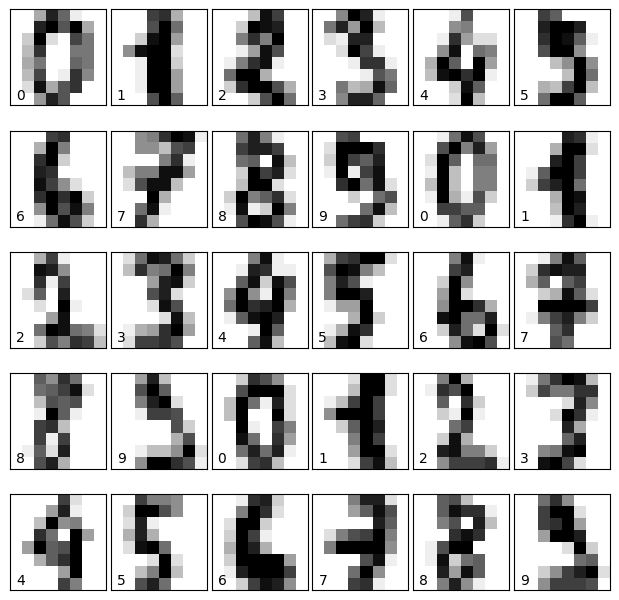

In [3]:
X = digits['images']
y = digits['target']
target_names = digits['target_names']
print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')

# Display sample data
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

In [4]:
# 8x8 Matrix als 64-stelligen Vektor wandeln
n_samples = len(X)
X = X.reshape((n_samples, -1))
print(f"After reshape = {X.shape}")
print  (X)


After reshape = (1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
# Trainings-/ Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [21]:
# Decision Tree Modell berechnen
# keine Standardisierung für Entscheidungsbäume

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=42,
            splitter='best')
clf.fit(X_train, y_train)

acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)          
print(f'Train Accuracy = {acc_train}')
print(f'Test Accuracy = {acc_test}')

#logger.info(scriptname + ';' + f'{acc_train:3.3f}' + ";" + f'{acc_test:3.3f}'+ ";" )
logger.info(scriptname + ';' + f'{acc_train:3.3f}' + ";" + f'{acc_test:3.3f}'+ ";" )


Train Accuracy = 1.0
Test Accuracy = 0.8777777777777778


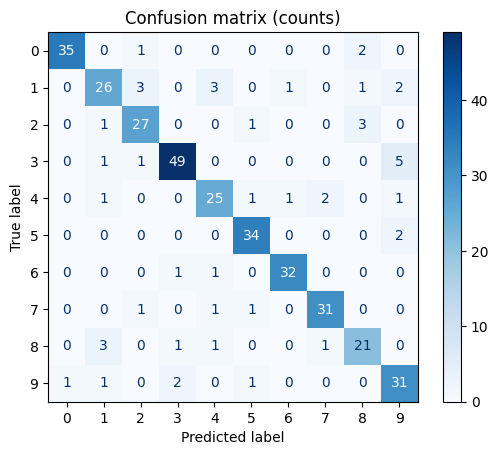

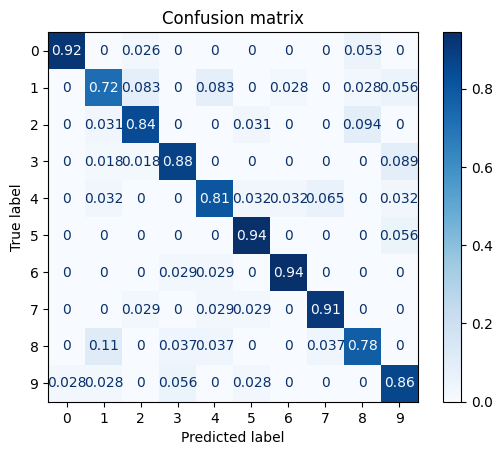

In [7]:
# Wahrheitsmatrix
titles_options = [
    ("Confusion matrix (counts)", None),
    ("Confusion matrix", "true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

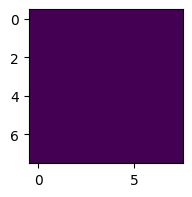

Erwartet wird nichts, vorhergesagt wird [4]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


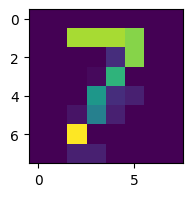

Erwartet wird 7, vorhergesagt wird [7]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


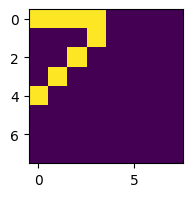

Erwartet wird 7, vorhergesagt wird [5]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


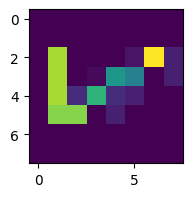

Erwartet wird 7, vorhergesagt wird [7]
Wahrscheinlichkeiten für 0,1,2,..9 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [8]:
# Test neuer Ziffern

# Als Test werden hier Ziffern mit der hand codiert. Der Einfachheit halber
# als array von 64 Grauwerte zwischen 0 und 255. Dazu wurde auf Papier
# eine Gitter mit 8x8 Zellen gezeichnet, darauf eine Ziffer und dann zeilenweise
# von links oben beginnend als ein Python array hingeschrieben.
#
# zuerst eine Nullmatrix als Vorlage
# zuerst eine Nullmatrix als Vorlage

def check_digit (X, Y):
    plt.figure(figsize=(2,2))
    plt.imshow(X)
    plt.show()
    X = X.reshape(1,-1)
    target = clf.predict(X)
    print ("Erwartet wird "+str(Y)+", vorhergesagt wird "+ str (target))
    np.set_printoptions(precision=3)
    np.set_printoptions(suppress=True)
    print ("Wahrscheinlichkeiten für 0,1,2,..9 " + str (clf.predict_proba(X)))



test = np.array ([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])
test7 = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  200,  200,  200,  188,  0,  0],
        [0,  0,  0,  0,  30,  188,  0,  0],
        [0,  0,  0,  6,  150,  0,  0,  0],
        [0,  0,  0,  122,  30,  20,  0,  0],
        [0,  0,  12,  100,  20,  0,  0,  0],
        [0,  0,  230,  0,  0,  0,  0,  0],
        [0,  0,  20,  20,  0,  0,  0,  0]])

test_small7 = np.array ([[ 200,   200,   200,  200,  0,  0,  0,  0],
        [0,  0,   0,  200,  0,  0,  0,  0],
        [0,  0,   200,  0,  0,  0,  0,  0],
        [0,   200,  0,  0,  0,  0,  0,  0],
        [ 200,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

test_template = np.array ([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

check_digit (test,"nichts")
check_digit (test7,7)
check_digit (test_small7,7)
# Test einer gedrehten 7
check_digit (test7.transpose(),7)
